#### 20/20. This is very nicely done Selene.

# DATA 300: Statistical Machine Learning

# Homework 4

## Name: Selene Nguyen

In [1]:
# Python Version 3.9.13, conda version 23.1.0

In [2]:
# Import packages
import sklearn # v 1.0.2
import numpy as np # v 1.21.5
import pandas as pd # v 1.4.4
import pmdarima as pm # v 2.0.3
import ydata_profiling as pp # v 4.5.1
import matplotlib.pyplot as plt # v 3.5.2
import statsmodels.api as sm # v 0.13.2
import sweetviz as sv # v 2.2.1
import statsmodels.tsa.stattools as stattools # v 0.13.2
import warnings as ww

from sklearn.linear_model import LogisticRegression # v 1.0.2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # v 1.0.2
from sklearn.model_selection import train_test_split # v 1.0.2
from sklearn.metrics import mean_absolute_error # v 1.0.2
from sklearn.metrics import mean_squared_error # v 1.0.2
from sklearn.metrics import mean_absolute_percentage_error # v 1.0.2
from sklearn.metrics import confusion_matrix # v 1.0.2
from sklearn.metrics import roc_curve, auc, roc_auc_score # v 1.0.2
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve # v 1.0.2
from sklearn.utils import resample # v 1.0.2

from sklearn.impute import SimpleImputer # v 1.0.2 # Impute missing values

from imblearn.over_sampling import RandomOverSampler, SMOTE # v 0.11.0
from imblearn.under_sampling import RandomUnderSampler # v 0.11.0

import matplotlib
matplotlib.use('Qt5Agg')  # for GUI display
import matplotlib.pyplot as plt # v 3.5.2
import seaborn as sns # v. 0.11.2

ww.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Read in the dataset
loan_df = pd.read_csv("/Users/nmn/Downloads/loan_default_data_set.csv")

In [4]:
loan_df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


### Data Preprocessing

**Impute Missing Data**

Based on Homework 3's EDA, 'rep_education' (categorical), 'pct_card_over_50_uti', and 'rep_income' (numerical) columns have missing values.

In [5]:
# 'rep_education' column
categorical_imputer = SimpleImputer(strategy='most_frequent')
loan_df['rep_education'] = categorical_imputer.fit_transform(loan_df['rep_education'].values.reshape(-1, 1))

In [6]:
# numerical columns
numeric_imputer = SimpleImputer(strategy='mean')
loan_df['pct_card_over_50_uti'] = numeric_imputer.fit_transform(loan_df[['pct_card_over_50_uti']])
loan_df['rep_income'] = numeric_imputer.fit_transform(loan_df[['rep_income']])

In [7]:
loan_df.isna().sum()

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
dtype: int64

**1. Create three samples of the data:**

**a. The first should be created by oversampling the minority class so that the number of observations of the minority and majority class are the same (18,000 for each class) and you have 36, 000 observations in total.**

In [47]:
# Number of observations in each class
loan_df['Def_ind'].value_counts()

0    18000
1     2000
Name: Def_ind, dtype: int64

Class 0 is the majority class; Class 1 is the minority class

In [8]:
# Separate the dataset into two datasets
dataset_1 = loan_df[loan_df['Def_ind'] == 0]  # Class 0
dataset_2 = loan_df[loan_df['Def_ind'] == 1]  # Class 1

In [9]:
# Check the number of observations in dataset_1
len(dataset_1)

18000

In [10]:
# Check the number of observations in dataset_2
len(dataset_2)

2000

In [11]:
# Oversample (bootstrap) the minority class
oversampled_dataset_2 = resample(dataset_2, replace=True, n_samples=18000, random_state=42) # Replace must be True because oversampling

In [12]:
# Concatenate the new oversampled minority dataset to the majority dataset
oversampled_data = pd.concat([dataset_1, oversampled_dataset_2])

In [13]:
# Save dataset
oversampled_data.to_csv('/Users/nmn/Downloads/oversampled_data.csv', index=True)

In [14]:
oversampled_data

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.11010,14819.057400,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.321300,college,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,0.550964,0,89365.057650,college,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.121300,college,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.485500,college,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.367900,graduate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,77308.29691,9562.452360,289,160,256,1,1,0,0.0,3,...,1,1,0.648877,0.673450,0.614106,0.550964,0,130894.770500,college,1
16445,102096.23460,12521.854100,329,175,319,0,0,0,0.0,0,...,1,0,0.518088,0.459295,0.465295,0.598659,0,143233.011100,college,1
7218,75163.61145,2683.930371,282,161,271,0,0,0,0.0,0,...,0,0,0.539372,0.610449,0.378401,0.604853,0,195225.769000,college,1
6388,105165.70390,11544.689600,154,67,188,0,0,0,0.0,4,...,1,0,0.546493,0.511424,0.500496,0.579121,0,166373.900129,high_school,1


In [15]:
# Check the number of observations for Class 1 of the new oversampled dataset
len(oversampled_data[oversampled_data['Def_ind']==1])

18000

**b. The second should be created by undersampling the majority class (2000 observations for each class) and you have 4000 observations in total.**

In [16]:
# Undersample the majority class
undersampled_dataset_1 = resample(dataset_1, replace=False, n_samples=2000, random_state=42)

In [17]:
# Concatenate the new undersampled majority dataset to the minority dataset
undersampled_data = pd.concat([undersampled_dataset_1, dataset_2])

In [18]:
# Save dataset
undersampled_data.to_csv('/Users/nmn/Downloads/undersampled_data.csv', index=True)

In [19]:
undersampled_data

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
2856,111977.12460,12823.313160,144,88,191,0,0,0,0.000000,0,...,0,0,0.543409,0.415367,0.507614,0.550964,0,171881.50000,high_school,0
8325,66321.69123,7132.268872,309,128,358,0,0,0,0.000000,1,...,0,0,0.487481,0.461952,0.584985,0.584065,0,155348.61050,college,0
10239,97961.09217,7684.659369,221,123,209,0,0,0,0.000000,0,...,0,0,0.434590,0.492010,0.326300,0.573053,0,194083.95720,college,0
6072,142252.03140,17130.868230,300,148,322,1,0,0,170.116655,0,...,0,0,0.447209,0.400874,0.543021,0.528149,0,168551.69260,college,0
797,92976.55077,11501.033440,349,174,386,0,0,0,0.000000,0,...,0,0,0.496548,0.317660,0.483710,0.503312,0,133204.86720,college,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19961,101185.23900,8551.413462,344,190,361,1,0,0,0.000000,0,...,0,0,0.517914,0.508975,0.501642,0.630670,0,137004.08820,college,1
19979,101238.81730,12260.749900,148,52,218,0,0,0,0.000000,1,...,1,0,0.902818,0.794570,0.929545,0.984288,1,158403.48710,high_school,1
19984,109717.64730,12295.671170,129,60,226,0,0,0,0.000000,3,...,0,0,0.688392,0.763726,0.816987,0.749705,0,199402.46450,college,1
19994,99102.92799,11033.901590,222,119,259,0,0,0,0.000000,0,...,0,0,0.591720,0.681487,0.631201,0.660454,0,167343.82270,graduate,1


In [20]:
# Check the number of observations for Class 0 of the new oversampled dataset
len(undersampled_data[undersampled_data['Def_ind']==0])

2000

**c. Use SMOTE to create the third data set. This is also an oversampling technique.**

In [21]:
# Encode "rep_education"
loan_df_dummies = pd.get_dummies(loan_df, columns=['rep_education'], prefix='rep')

# Columns names
print(loan_df_dummies.columns)

Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'Def_ind',
       'rep_college', 'rep_graduate', 'rep_high_school', 'rep_other'],
      dtype='object')


In [22]:
# Separate dataset into Y and X variables
y = loan_df_dummies["Def_ind"] # "Def_ind" column
X = loan_df_dummies.loc[:, loan_df_dummies.columns != "Def_ind"] # All columns except the "Def_ind" column

In [23]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)

# Apply SMOTE to create an oversampled dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Concatenate the oversampled dataset with the original dataset
smote_data = pd.concat([X_smote, y_smote], axis=1)

# Save the oversampled dataset
smote_data.to_csv('smote_oversampled_data.csv', index=True)

In [24]:
smote_data

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_college,rep_graduate,rep_high_school,rep_other,Def_ind
0,102956.110100,14819.057400,238,104,264,0,0,0,0.000000,0,...,0.342183,0.513934,0.550866,0,118266.321300,1,0,0,0,0
1,132758.725800,18951.934550,384,197,371,0,0,0,0.000000,0,...,0.540671,0.418016,0.550964,0,89365.057650,1,0,0,0,0
2,124658.917400,15347.929690,277,110,288,0,0,0,0.000000,0,...,0.338560,0.341627,0.451417,0,201365.121300,1,0,0,0,0
3,133968.536900,14050.713340,375,224,343,0,0,0,0.000000,2,...,0.683589,0.542940,0.607843,0,191794.485500,1,0,0,0,0
4,143601.801700,14858.515270,374,155,278,0,0,0,0.000000,0,...,0.510812,0.632934,0.573680,0,161465.367900,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,88250.717381,9208.283288,314,150,318,2,1,1,9592.746341,0,...,0.443421,0.457871,0.469228,1,194940.905539,0,0,0,0,1
35996,145541.415393,17686.523997,347,174,339,0,0,0,0.000000,2,...,0.496538,0.464801,0.516709,0,186829.837864,0,0,0,0,1
35997,68028.613864,4451.785186,353,164,295,0,0,0,0.000000,0,...,0.413578,0.396250,0.538789,0,181069.192986,1,0,0,0,1
35998,81689.868788,10062.472282,226,103,230,0,0,0,0.000000,0,...,0.371931,0.418590,0.435596,0,123011.847392,0,0,0,0,1


In [25]:
# Check the number of observations for Class 1 of the new oversampled dataset
len(smote_data[smote_data['Def_ind']==1])

18000

**2. Fit a Logistic regression and Linear Discriminant Analysis (LDA) on all three datasets so that you have 6 model objects. A model for each of the three datasets you have created by using different sampling techniques.**

**& 3. Compare model performance on accuracy, recall, and precision. Report your findings.**

### Oversampled Dataset

In [26]:
# Encode "rep_education"
oversampled_dummies = pd.get_dummies(oversampled_data, columns=['rep_education'])

# Columns names
print(oversampled_dummies.columns)

Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'Def_ind',
       'rep_education_college', 'rep_education_graduate',
       'rep_education_high_school', 'rep_education_other'],
      dtype='object')


In [27]:
# Separate dataset into Y and X variables
y_over = oversampled_dummies["Def_ind"] # "Def_ind" column
X_over = oversampled_dummies.loc[:, oversampled_dummies.columns != "Def_ind"] # All columns except the "Def_ind" column

In [28]:
# Split the data set into training set and testing set (80% - 20%) using train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=5)

***Logistic Regression***

In [29]:
# Instantiate the model
over_log_model = LogisticRegression()

# Fit the model
over_log_model.fit(X_train_over, y_train_over)

# Make predictions on the test set
y_pred_over = over_log_model.predict(X_test_over)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_over, y_pred_over)
precision = precision_score(y_test_over, y_pred_over)
recall = recall_score(y_test_over, y_pred_over)

# Generate classification report
target_names = ['not defaulted', 'defaulted']
classification_rep = classification_report(y_test_over, y_pred_over, target_names=target_names)

# Interpret the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)

Accuracy: 0.63875
Precision: 0.6904059040590406
Recall: 0.5150013762730525
Classification Report:
                precision    recall  f1-score   support

not defaulted       0.61      0.76      0.68      3567
    defaulted       0.69      0.52      0.59      3633

     accuracy                           0.64      7200
    macro avg       0.65      0.64      0.63      7200
 weighted avg       0.65      0.64      0.63      7200



***LDA***

In [30]:
# Create and fit the LDA model
over_lda = LinearDiscriminantAnalysis()
over_lda.fit(X_train_over, y_train_over)

LinearDiscriminantAnalysis()

In [31]:
# Make predictions on the test set
y_pred_over = over_lda.predict(X_test_over)

# Calculate accuracy
accuracy = accuracy_score(y_test_over, y_pred_over)

# Calculate precision with average='weighted'
precision_weighted = precision_score(y_test_over, y_pred_over, average='weighted')

# Calculate recall with average='weighted'
recall_weighted = recall_score(y_test_over, y_pred_over, average='weighted')

# Report the results
print(f'Accuracy: {accuracy}')
print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')

Accuracy: 0.7194444444444444
Precision (Weighted): 0.7206128935289794
Recall (Weighted): 0.7194444444444444


In [32]:
print(classification_report(y_test_over, y_pred_over, digits=3))

              precision    recall  f1-score   support

           0      0.703     0.751     0.726      3567
           1      0.738     0.689     0.712      3633

    accuracy                          0.719      7200
   macro avg      0.720     0.720     0.719      7200
weighted avg      0.721     0.719     0.719      7200



### Undersampled Dataset

In [33]:
# Encode "rep_education"
undersampled_dummies = pd.get_dummies(undersampled_data, columns=['rep_education'])

# Columns names
print(undersampled_dummies.columns)

Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'Def_ind',
       'rep_education_college', 'rep_education_graduate',
       'rep_education_high_school', 'rep_education_other'],
      dtype='object')


In [34]:
# Separate dataset into Y and X variables
y_under = undersampled_dummies["Def_ind"] # "Def_ind" column
X_under = undersampled_dummies.loc[:, undersampled_dummies.columns != "Def_ind"] # All columns except the "Def_ind" column

In [35]:
# Split the data set into training set and testing set (80% - 20%) using train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=5)

***Logistic Regression***

In [36]:
# Instantiate the model
under_log_model = LogisticRegression()

# Fit the model
under_log_model.fit(X_train_under, y_train_under)

# Make predictions on the test set
y_pred_under = under_log_model.predict(X_test_under)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_under, y_pred_under)
precision = precision_score(y_test_under, y_pred_under)
recall = recall_score(y_test_under, y_pred_under)

# Generate classification report
target_names = ['not defaulted', 'defaulted']
classification_rep = classification_report(y_test_under, y_pred_under, target_names=target_names)

# Interpret the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)

Accuracy: 0.645
Precision: 0.711340206185567
Recall: 0.5085995085995086
Classification Report:
                precision    recall  f1-score   support

not defaulted       0.61      0.79      0.69       393
    defaulted       0.71      0.51      0.59       407

     accuracy                           0.65       800
    macro avg       0.66      0.65      0.64       800
 weighted avg       0.66      0.65      0.64       800



***LDA***

In [37]:
# Create and fit the LDA model
under_lda = LinearDiscriminantAnalysis()
under_lda.fit(X_train_under, y_train_under)

LinearDiscriminantAnalysis()

In [38]:
# Make predictions on the test set
y_pred_under = under_lda.predict(X_test_under)

# Calculate accuracy
accuracy = accuracy_score(y_test_under, y_pred_under)

# Calculate precision with average='weighted'
precision_weighted = precision_score(y_test_under, y_pred_under, average='weighted')

# Calculate recall with average='weighted'
recall_weighted = recall_score(y_test_under, y_pred_under, average='weighted')

# Report the results
print(f'Accuracy: {accuracy}')
print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')

Accuracy: 0.74125
Precision (Weighted): 0.7417592662064826
Recall (Weighted): 0.74125


In [39]:
print(classification_report(y_test_under, y_pred_under, digits=3))

              precision    recall  f1-score   support

           0      0.728     0.756     0.742       393
           1      0.755     0.727     0.741       407

    accuracy                          0.741       800
   macro avg      0.742     0.741     0.741       800
weighted avg      0.742     0.741     0.741       800



### SMOTE Dataset

In [40]:
# Separate dataset into Y and X variables
y_smote = smote_data["Def_ind"] # "Def_ind" column
X_smote = smote_data.loc[:, smote_data.columns != "Def_ind"] # All columns except the "Def_ind" column

In [41]:
# Split the data set into training set and testing set (80% - 20%) using train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=5)

***Logistic Regression***

In [42]:
# Instantiate the model
smote_log_model = LogisticRegression()

# Fit the model
smote_log_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = smote_log_model.predict(X_test_smote)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_smote, y_pred_smote)
precision = precision_score(y_test_smote, y_pred_smote)
recall = recall_score(y_test_smote, y_pred_smote)

# Generate classification report
target_names = ['not defaulted', 'defaulted']
classification_rep = classification_report(y_test_smote, y_pred_smote, target_names=target_names)

# Interpret the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6205555555555555
Precision: 0.6639256346085091
Recall: 0.5089065497396547
Classification Report:
                precision    recall  f1-score   support

not defaulted       0.59      0.74      0.66      3551
    defaulted       0.66      0.51      0.58      3649

     accuracy                           0.62      7200
    macro avg       0.63      0.62      0.62      7200
 weighted avg       0.63      0.62      0.62      7200



***LDA***

In [43]:
# Create and fit the LDA model
smote_lda = LinearDiscriminantAnalysis()
smote_lda.fit(X_train_smote, y_train_smote)

LinearDiscriminantAnalysis()

In [44]:
# Make predictions on the test set
y_pred_smote = smote_lda.predict(X_test_smote)

# Calculate accuracy
accuracy = accuracy_score(y_test_smote, y_pred_smote)

# Calculate precision with average='weighted'
precision_weighted = precision_score(y_test_smote, y_pred_smote, average='weighted')

# Calculate recall with average='weighted'
recall_weighted = recall_score(y_test_smote, y_pred_smote, average='weighted')

# Report the results
print(f'Accuracy: {accuracy}')
print(f'Precision (Weighted): {precision_weighted}')
print(f'Recall (Weighted): {recall_weighted}')

Accuracy: 0.82125
Precision (Weighted): 0.8320945168848468
Recall (Weighted): 0.82125


In [45]:
print(classification_report(y_test_smote, y_pred_smote, digits=3))

              precision    recall  f1-score   support

           0      0.770     0.909     0.834      3551
           1      0.892     0.736     0.807      3649

    accuracy                          0.821      7200
   macro avg      0.831     0.822     0.820      7200
weighted avg      0.832     0.821     0.820      7200



Comparing the 6 models, it can be observed that the SMOTE LDA model has the highest accuracy, precision, and recall. However, the SMOTE logistic regression model has the lowest accuracy, precision, and recall. 

In general, LDA models performs better than logistic regression models, based on accuracy, precision, and recall.

**4. Plot an AUC_ROC curve and choose the best model based on the curve.**

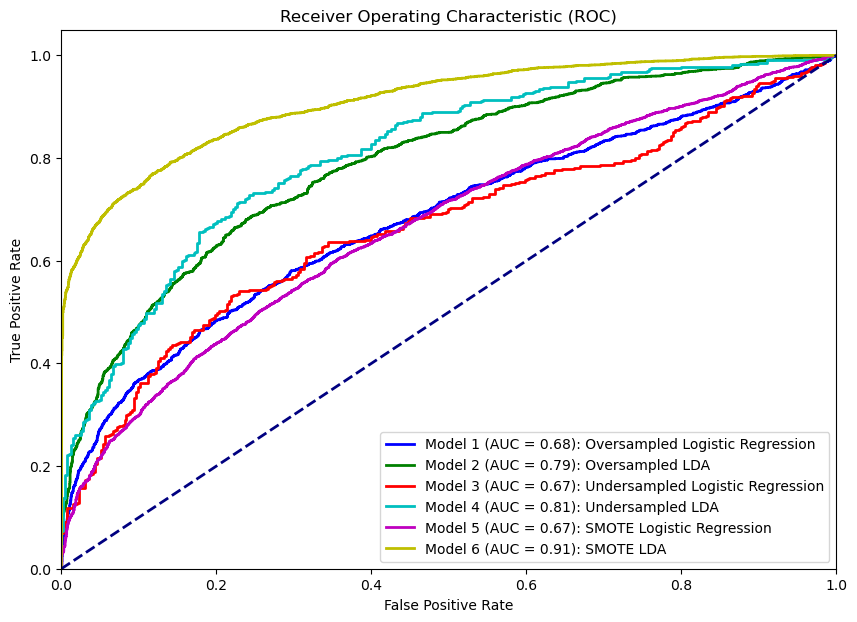

In [46]:
# Calculate ROC curve and AUC for each model

y_pred_proba1 = over_log_model.predict_proba(X_test_over)[::,1]
fpr1, tpr1, _ = roc_curve(y_test_over, y_pred_proba1)
roc_auc1 = auc(fpr1, tpr1)

y_pred_proba2 = over_lda.predict_proba(X_test_over)[::,1]
fpr2, tpr2, _ = roc_curve(y_test_over, y_pred_proba2)
roc_auc2 = auc(fpr2, tpr2)

y_pred_proba3 = under_log_model.predict_proba(X_test_under)[::,1]
fpr3, tpr3, _ = roc_curve(y_test_under, y_pred_proba3)
roc_auc3 = auc(fpr3, tpr3)

y_pred_proba4 = under_lda.predict_proba(X_test_under)[::,1]
fpr4, tpr4, _ = roc_curve(y_test_under, y_pred_proba4)
roc_auc4 = auc(fpr4, tpr4)

y_pred_proba5 = smote_log_model.predict_proba(X_test_smote)[::,1]
fpr5, tpr5, _ = roc_curve(y_test_smote, y_pred_proba5)
roc_auc5 = auc(fpr5, tpr5)

y_pred_proba6 = smote_lda.predict_proba(X_test_smote)[::,1]
fpr6, tpr6, _ = roc_curve(y_test_smote, y_pred_proba6)
roc_auc6 = auc(fpr6, tpr6)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, color='b', lw=2, label='Model 1 (AUC = %0.2f): Oversampled Logistic Regression' % roc_auc1)
plt.plot(fpr2, tpr2, color='g', lw=2, label='Model 2 (AUC = %0.2f): Oversampled LDA' % roc_auc2)
plt.plot(fpr3, tpr3, color='r', lw=2, label='Model 3 (AUC = %0.2f): Undersampled Logistic Regression' % roc_auc3)
plt.plot(fpr4, tpr4, color='c', lw=2, label='Model 4 (AUC = %0.2f): Undersampled LDA' % roc_auc4)
plt.plot(fpr5, tpr5, color='m', lw=2, label='Model 5 (AUC = %0.2f): SMOTE Logistic Regression' % roc_auc5)
plt.plot(fpr6, tpr6, color='y', lw=2, label='Model 6 (AUC = %0.2f): SMOTE LDA' % roc_auc6)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**5. Which model would you prefer?  Explain.**

Based on the AUC_ROC curve, I would prefer SMOTE LDA model (Model 6), since the higher the AUC, the better the model is. Or in other words, the closer to the top left area the curve is, the better the model.
It is also observed that generally, LDA models are better then Logistic Regression models based on the curves.
For LDA, the SMOTE model performs the best, while for Logistic Regression, the first Oversampled model performs the best.

This is consistent with the results from comparing models based on accuracy, precision, and recall.